In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
df0 = pd.read_csv("/content/drive/MyDrive/HR_comma_sep.csv")


In [ ]:
df = df0.copy()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Gather basic information about the data
df.head(n = 10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
# Gather descriptive statistics about the data
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
df = df.rename(columns={
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'Department': 'department',
    'average_montly_hours': 'average_monthly_hours'
})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
# Check for missing values
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


In [ ]:
# Check for duplicates
df.duplicated().sum()

np.int64(3008)

In [ ]:
# Inspect some rows containing duplicates as needed
duplicates = df[df.duplicated()].head(n = 10)
print(duplicates)

       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
1516                 0.40             0.50               2   
1616                 0.37             0.46               2   
1696                 0.39             0.56               2   
1833                 0.10             0.85               6   
12000                0.38             0.53               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461        

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_clean = df.drop_duplicates()

In [ ]:
# Display first few rows of new dataframe as needed
df_clean.head(n = 10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


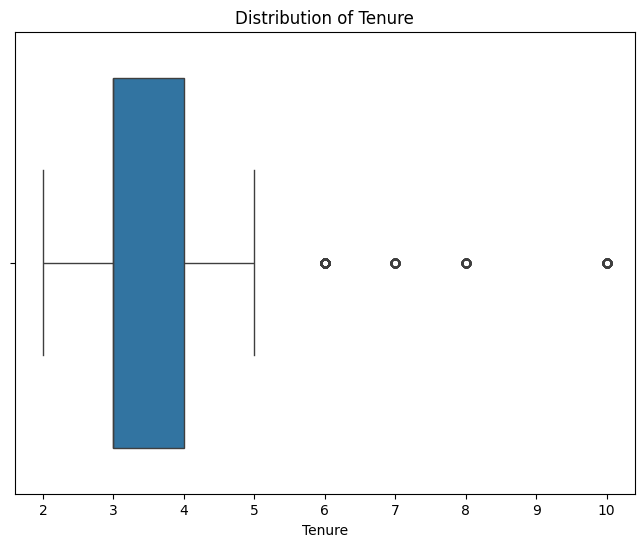

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['tenure'])
plt.xlabel('Tenure')
plt.title('Distribution of Tenure')
plt.show()

In [ ]:
# Determine the number of rows containing outliers
# Define threshold for outliers (e.g., outside 1.5 times the interquartile range)
threshold = 1.5

# Calculate the interquartile range (IQR)
q1 = df_clean['tenure'].quantile(0.25)
q3 = df_clean['tenure'].quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

# Count the number of rows containing outliers
outliers_count = df_clean[(df_clean['tenure'] < lower_bound) | (df_clean['tenure'] > upper_bound)].shape[0]

# Display the number of rows containing outliers
print("Number of rows containing outliers in 'tenure':", outliers_count)

Number of rows containing outliers in 'tenure': 824


In [ ]:
# Get numbers of people who left vs. stayed
left_counts = df_clean['left'].value_counts()

# Get percentages of people who left vs. stayed
left_percentages = df_clean['left'].value_counts(normalize=True) * 100

# Display the results
print("Number of employees who left vs. stayed:")
print(left_counts)
print("\nPercentage of employees who left vs. stayed:")
print(left_percentages)

Number of employees who left vs. stayed:
left
0    10000
1     1991
Name: count, dtype: int64

Percentage of employees who left vs. stayed:
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


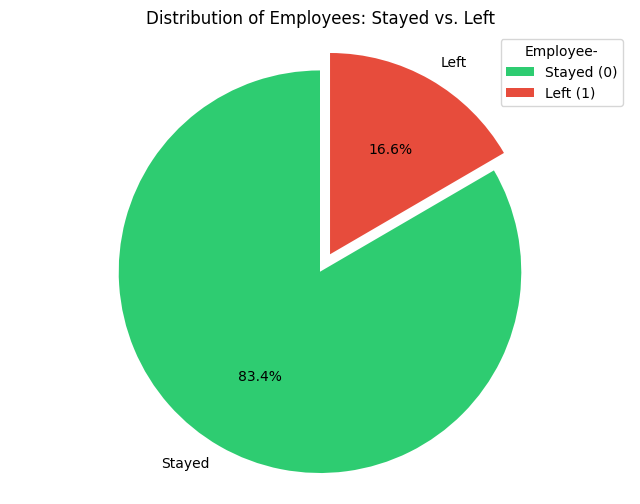

In [ ]:
# Calculate the count of employees who left versus stayed
attrition_counts = df_clean['left'].value_counts()

# Define labels and colors for the pie chart
labels = ['Stayed', 'Left']
colors = ['#2ecc71', '#e74c3c']

# Create the advanced pie chart
plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Employees: Stayed vs. Left')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.axis('equal')
plt.show()

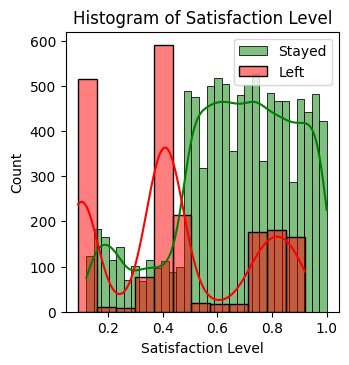

In [ ]:
plt.figure(figsize=(12, 8))

# Plot histogram for satisfaction_level
plt.subplot(2, 3, 1)
sns.histplot(df_clean[df_clean['left'] == 0]['satisfaction_level'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['satisfaction_level'], kde=True, color='red', label='Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Histogram of Satisfaction Level')
plt.legend()

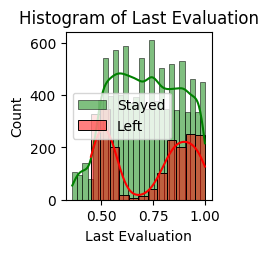

In [ ]:

plt.subplot(2, 3, 2)
sns.histplot(df_clean[df_clean['left'] == 0]['last_evaluation'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['last_evaluation'], kde=True, color='red', label='Left')
plt.xlabel('Last Evaluation')
plt.ylabel('Count')
plt.title('Histogram of Last Evaluation')
plt.legend()

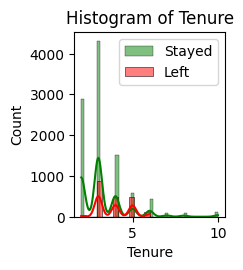

In [ ]:
# Plot histogram for tenure
plt.subplot(2, 3, 5)
sns.histplot(df_clean[df_clean['left'] == 0]['tenure'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['tenure'], kde=True, color='red', label='Left')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Histogram of Tenure')
plt.legend()

plt.tight_layout()
plt.show()


/tmp/ipython-input-4164531416.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rate = df_clean.groupby(bins)['left'].mean() * 100
/tmp/ipython-input-4164531416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='RdYlGn')


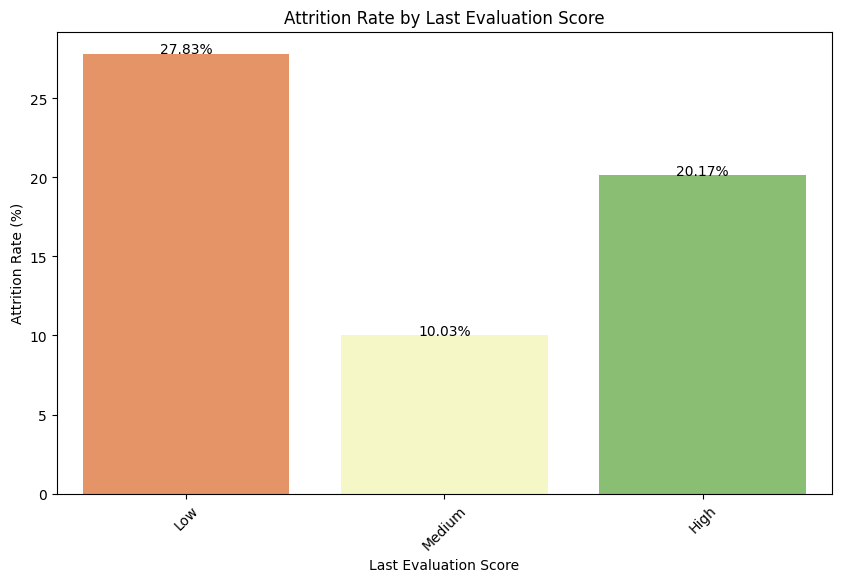

In [ ]:
# Create bins for different ranges of last evaluation scores
bins = pd.cut(df_clean['last_evaluation'], bins=[0, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High'])

# Calculate the attrition rate for each bin
attrition_rate = df_clean.groupby(bins)['left'].mean() * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='RdYlGn')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Last Evaluation Score')

# Add count labels to the bars
for i, value in enumerate(attrition_rate.values):
    plt.text(i, value, f'{value:.2f}%', ha='center')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()

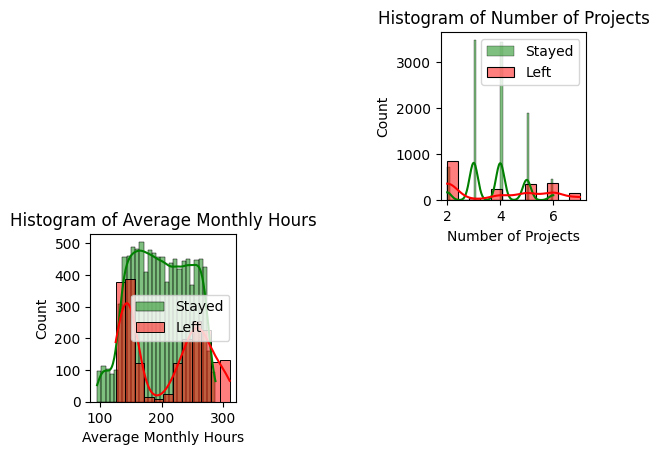

In [ ]:
# Plot histogram for number_project
plt.subplot(2, 3, 3)
sns.histplot(df_clean[df_clean['left'] == 0]['number_project'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['number_project'], kde=True, color='red', label='Left')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.title('Histogram of Number of Projects')
plt.legend()

# Plot histogram for average_monthly_hours
plt.subplot(2, 3, 4)
sns.histplot(df_clean[df_clean['left'] == 0]['average_monthly_hours'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['average_monthly_hours'], kde=True, color='red', label='Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.title('Histogram of Average Monthly Hours')
plt.legend()

/tmp/ipython-input-2004519445.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=left_by_department.values, y=left_by_department.index, palette=colors)


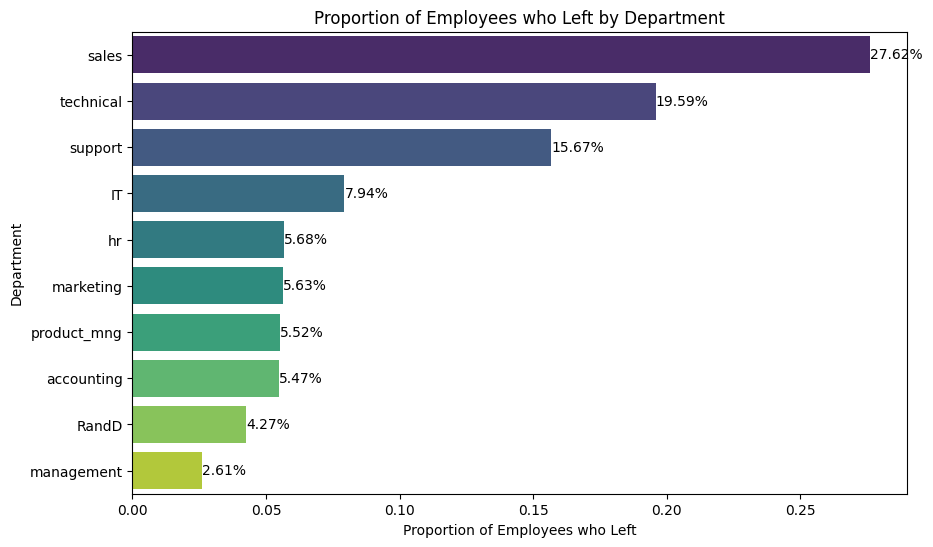

In [ ]:
# Calculate the proportion of employees who left in each department
left_by_department = df_clean[df_clean['left'] == 1]['department'].value_counts(normalize=True)

# Sort the departments based on the proportion of employees who left
left_by_department = left_by_department.sort_values(ascending=False)

# Create the advanced horizontal bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(left_by_department))
ax = sns.barplot(x=left_by_department.values, y=left_by_department.index, palette=colors)
plt.xlabel('Proportion of Employees who Left')
plt.ylabel('Department')
plt.title('Proportion of Employees who Left by Department')

# Add data labels to the bars
for i, value in enumerate(left_by_department.values):
    ax.text(value, i, f'{value:.2%}', va='center')

plt.show()

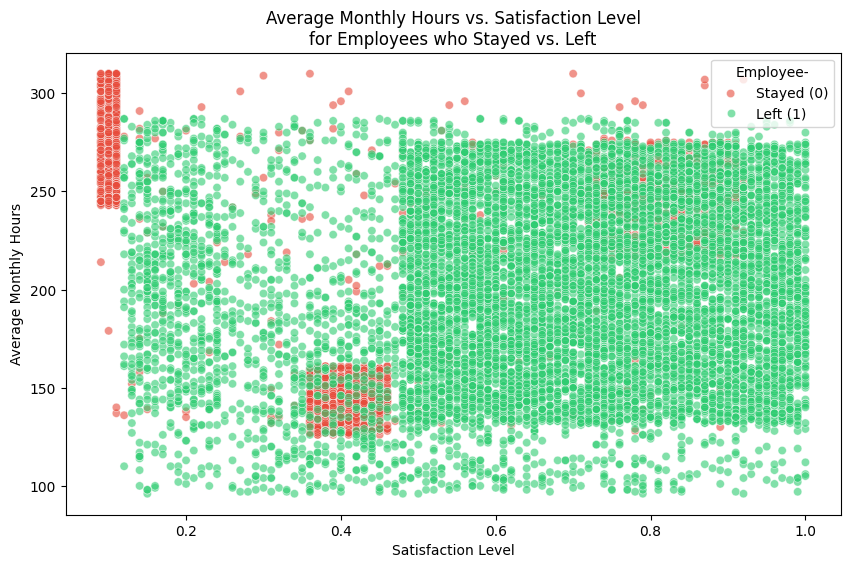

In [ ]:
plt.figure(figsize=(10, 6))

# Create scatter plot comparing employees who stayed versus those who left
sns.scatterplot(x='satisfaction_level', y='average_monthly_hours', hue='left', data=df_clean, palette={0: '#2ecc71', 1: '#e74c3c'}, alpha=0.6)

# Set labels and title
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours vs. Satisfaction Level\nfor Employees who Stayed vs. Left')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.show()


<Figure size 1000x600 with 0 Axes>

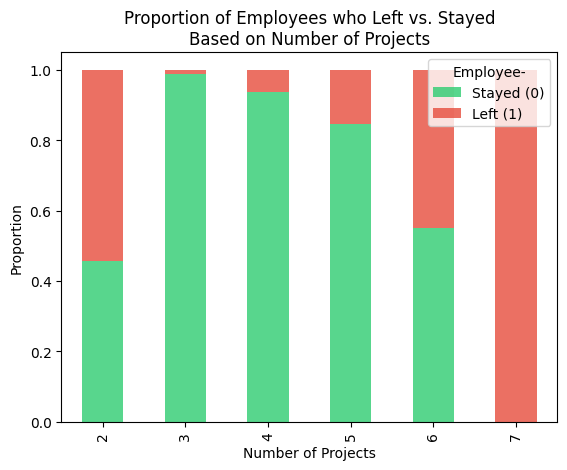

In [ ]:
plt.figure(figsize=(10, 6))

# Calculate the proportion of employees who left versus stayed based on project counts
project_counts = df_clean.groupby(['number_project', 'left']).size().unstack()
project_counts['Total'] = project_counts.sum(axis=1)
project_proportions = project_counts.div(project_counts['Total'], axis=0)

# Create the stacked bar plot
project_proportions[[0, 1]].plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], alpha=0.8)

# Set labels and title
plt.xlabel('Number of Projects')
plt.ylabel('Proportion')
plt.title('Proportion of Employees who Left vs. Stayed\nBased on Number of Projects')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.show()

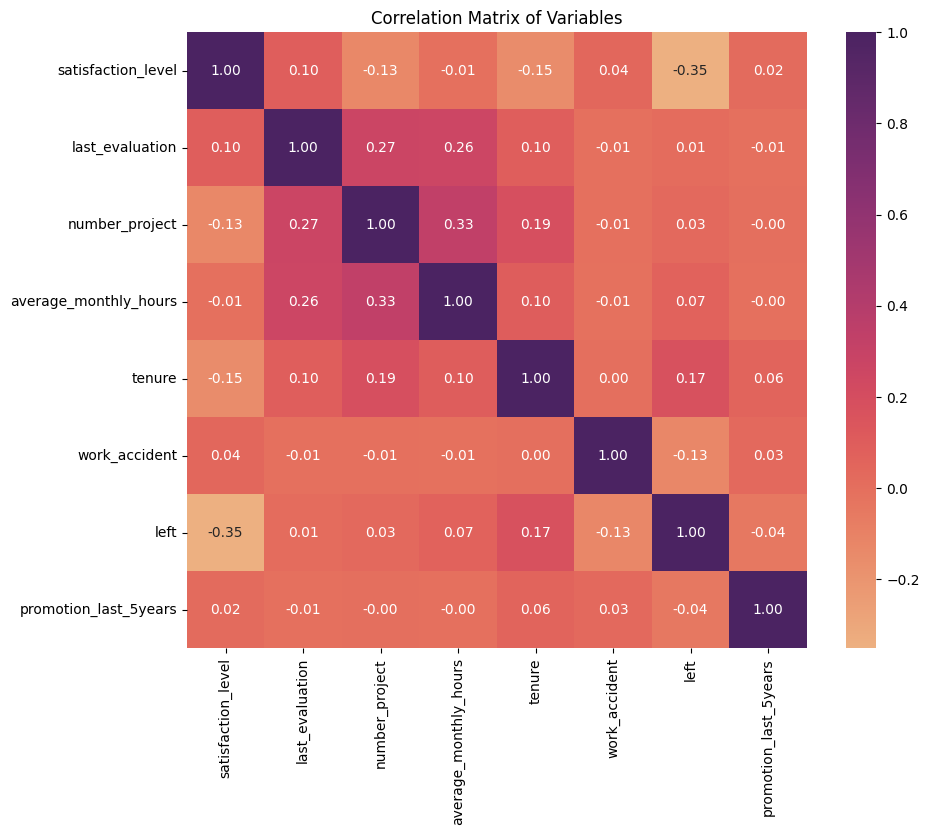

In [ ]:
# Compute the correlation matrix
corr_matrix = df_clean.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

In [ ]:
# Copy the df_clean dataframe to df_model
df_model = df_clean.copy()

In [ ]:
# Count the occurrences of each class in the 'left' column
data_balance = df_model['left'].value_counts()

# Calculate the percentage of each class
data_balance_percentage = data_balance / len(df_model) * 100

print("Data Balance:")
print(data_balance)
print("\nData Balance Percentage:")
print(data_balance_percentage)

Data Balance:
left
0    10000
1     1991
Name: count, dtype: int64

Data Balance Percentage:
left
0    83.39588
1    16.60412
Name: count, dtype: float64


In [ ]:
# One-hot encode 'department'
df_model = pd.get_dummies(df_model, columns=['department'], drop_first=True)

# Ordinal encode 'salary'
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_model['salary'] = df_model['salary'].map(salary_mapping)

In [ ]:
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


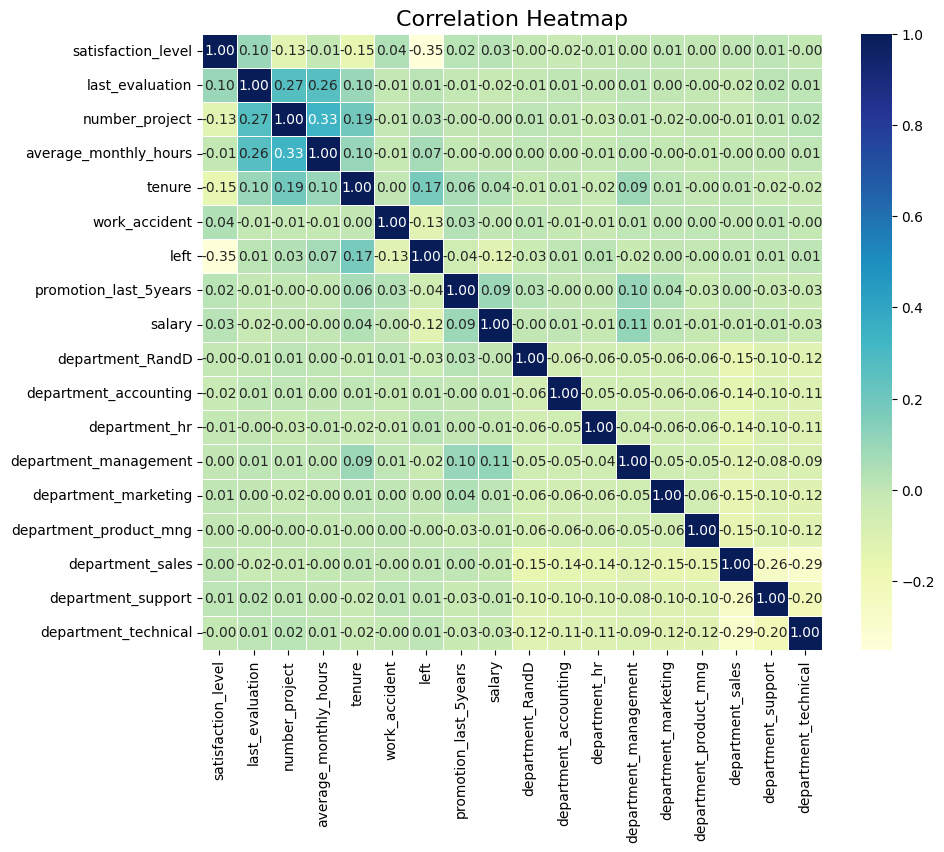

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_model.corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap with green tones
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()


In [ ]:
# Calculate the first and third quartiles for 'tenure'
Q1 = df_model['tenure'].quantile(0.25)
Q3 = df_model['tenure'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'tenure' column
df_model = df_model[(df_model['tenure'] >= lower_bound) & (df_model['tenure'] <= upper_bound)]


df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [ ]:
# Isolate the outcome variable 'left' from the features
X = df_model.drop('left', axis=1)  # Features (all columns except 'left')
y = df_model['left']  # Outcome variable 'left'

# Display the first few rows of the feature dataframe (X) and the outcome variable (y)
print("# Feature DataFrame (X):")
print(X.head())
print('\n ------------------------------------------------------------------------- \n')
print("# Outcome Variable (y):")
print(y.head())

# Feature DataFrame (X):
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_RandD  \
0       3              0                      0       0             False   
2       4              0                      0       1             False   
3       5              0                      0       0             False   
4       3              0                      0       0             False   
5       3              0                      0       0             False   

   department_accounting 

In [ ]:
# Split the data into training and testing sets, with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shape - X_train: (7816, 17) y_train: (7816,)
Testing set shape - X_test: (3351, 17) y_test: (3351,)


In [ ]:
# Create a logistic regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=500)

# Fit the model to the training dataset
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [ ]:
# Use the trained logistic regression model to make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Display the first few predicted values
print("Predicted values for the test set:")
print(y_pred[:10])

Predicted values for the test set:
[0 0 0 0 1 0 0 0 0 1]


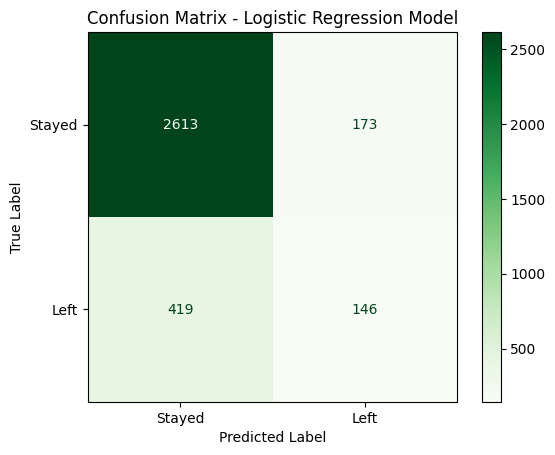

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Stayed", "Left"])
disp.plot(cmap='Greens')

# Add title and axis labels
plt.title("Confusion Matrix - Logistic Regression Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])

# Display the evaluation metrics
print("Evaluation Metrics: \n-------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Evaluation Metrics: 
-------------------
Accuracy: 0.8233
Precision: 0.4577
Recall: 0.2584
F1-score: 0.3303
AUC-ROC: 0.8808


In [ ]:
# Create a copy of the DataFrame for decision tree and random forest classification
df_tree = df_clean.copy()

# Display the first few rows of the new DataFrame to verify
df_tree.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Check data balance
data_balance = df_tree['left'].value_counts()
data_balance_percentage = df_tree['left'].value_counts(normalize=True) * 100

print("Data Balance:")
print(data_balance)
print("\nData Balance Percentage:")
print(data_balance_percentage)

Data Balance:
left
0    10000
1     1991
Name: count, dtype: int64

Data Balance Percentage:
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


In [ ]:
df_encoded = pd.get_dummies(df_tree, columns=['department'], drop_first=True)

# Ordinal encode 'salary'
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_encoded['salary'] = df_tree['salary'].map(salary_mapping)

In [ ]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [ ]:
# Isolate the outcome variable 'left' from the features
X = df_encoded.drop('left', axis=1)  # Features (all columns except 'left')
y = df_encoded['left']  # Outcome variable 'left'

# Display the first few rows of the feature dataframe (X) and the outcome variable (y)
print("# Feature DataFrame (X):")
print(X.head())
print('\n ------------------------------------------------------------------------- \n')
print("# Outcome Variable (y):")
print(y.head())

# Feature DataFrame (X):
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_RandD  \
0       3              0                      0       0             False   
1       6              0                      0       1             False   
2       4              0                      0       1             False   
3       5              0                      0       0             False   
4       3              0                      0       0             False   

   department_accounting 

In [ ]:
# Split the data into training and testing sets, with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shape - X_train: (8393, 17) y_train: (8393,)
Testing set shape - X_test: (3598, 17) y_test: (3598,)


In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'max_features': [1.0],
    'max_samples': [0.7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [50, 100],
}


# Define the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, scoring=scoring, cv=5, refit='f1')


In [ ]:
# Create a new random forest classifier with the best parameters
best_rf = RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)

# Fit the model to the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# Display the evaluation metrics
print("Evaluation Metrics: \n-------------------")
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-score: {f1:}")
print(f"AUC-ROC: {roc_auc:}")

Evaluation Metrics: 
-------------------
Accuracy: 0.9849916620344636
Precision: 0.9805309734513274
Recall: 0.9279731993299832
F1-score: 0.9535283993115319
AUC-ROC: 0.9806025015670377


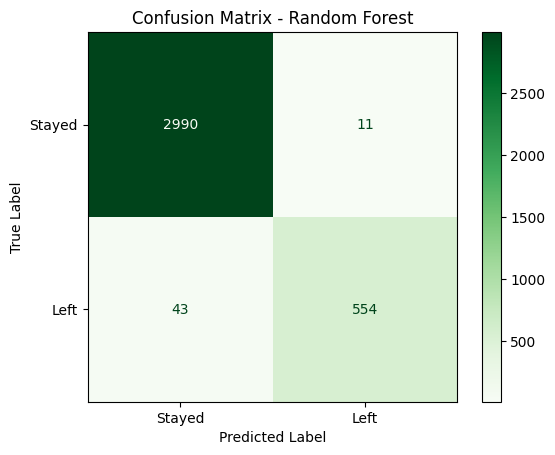

In [ ]:
# Get predictions using the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Stayed", "Left"])
disp_rf.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

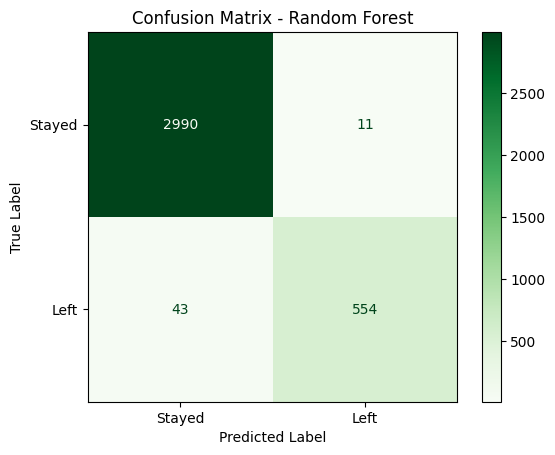

In [ ]:
# Get predictions using the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Stayed", "Left"])
disp_rf.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Initialize XGBoost classifier with binary logistic objective
xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2],
    'gamma': [0, 1, 2],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Define the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Perform Grid Search with 5-fold cross-validation
xgb_pred = GridSearchCV(xgb_clf, param_grid, scoring=scoring, cv=5, refit='f1')

In [ ]:
%%time

# Fit the XGBoost model to the training data
xgb_pred.fit(X_train, y_train)


InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'fowlkes_mallows_score', 'neg_mean_poisson_deviance', 'matthews_corrcoef', 'jaccard_weighted', 'accuracy', 'precision', 'neg_median_absolute_error', 'recall_macro', 'precision_micro', 'precision_weighted', 'adjusted_mutual_info_score', 'neg_mean_absolute_percentage_error', 'neg_max_error', 'f1_micro', 'f1_samples', 'neg_brier_score', 'jaccard_macro', 'neg_mean_gamma_deviance', 'precision_macro', 'recall', 'positive_likelihood_ratio', 'f1_weighted', 'recall_micro', 'f1', 'balanced_accuracy', 'adjusted_rand_score', 'r2', 'neg_root_mean_squared_log_error', 'precision_samples', 'rand_score', 'explained_variance', 'mutual_info_score', 'jaccard_samples', 'roc_auc_ovo_weighted', 'roc_auc_ovo', 'd2_absolute_error_score', 'completeness_score', 'jaccard', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_negative_likelihood_ratio', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'normalized_mutual_info_score', 'homogeneity_score', 'average_precision', 'recall_samples', 'recall_weighted', 'top_k_accuracy', 'roc_auc', 'v_measure_score', 'neg_log_loss', 'f1_macro', 'jaccard_micro', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got {'recall', 'accuracy', 'precision', 'f1'} instead.